In [30]:
from torchvision import datasets, transforms
from vidaug import augmentors as va
import matplotlib.pyplot as plt

from utils import create_image_sequence

In [31]:
# Load MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

mnist_train = datasets.MNIST(root=".", train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root=".", train=False, download=True, transform=transform)

In [55]:
seq_len = 10

In [71]:
"""
List of augmenters:
    * TemporalBeginCrop
    * TemporalCenterCrop
    * TemporalRandomCrop
    * InverseOrder
    * Downsample
    * Upsample
    * TemporalFit
    * TemporalElasticTransformation
"""

sometimes = lambda aug: va.Sometimes(1.0, aug)  # 100% of the time
sequential_augmentation = va.Sequential(
    [
        sometimes(va.InverseOrder()),
        # sometimes(va.Downsample(ratio=0.5))   # smth wrong with this one
    ]
)

In [72]:
images_sequence_tensor = create_image_sequence(mnist_test, seq_len)
print(type(images_sequence_tensor))
print(images_sequence_tensor.shape)

<class 'torch.Tensor'>
torch.Size([10, 1, 28, 28])


In [73]:
images_sequence = [
    images_sequence_tensor[i].numpy() for i in range(images_sequence_tensor.size(0))
]
print(type(images_sequence))
print(len(images_sequence))
print(images_sequence[0].shape)

<class 'list'>
10
(1, 28, 28)


In [74]:
augmented_images_sequence = sequential_augmentation(images_sequence)

# for some reason last image is dropped
print(type(augmented_images_sequence))
print(len(augmented_images_sequence))
print(augmented_images_sequence[0].shape)

<class 'list'>
9
(1, 28, 28)


In [75]:
def display_frames(original_frames, augmented_frames, num_frames=5):
    fig, axs = plt.subplots(2, num_frames, figsize=(15, 5))
    for i in range(num_frames):
        axs[0, i].imshow(original_frames[i].squeeze())
        axs[0, i].axis("off")
        axs[0, i].set_title("Original")

        axs[1, i].imshow(augmented_frames[i].squeeze())
        axs[1, i].axis("off")
        axs[1, i].set_title("Augmented")
    plt.show()

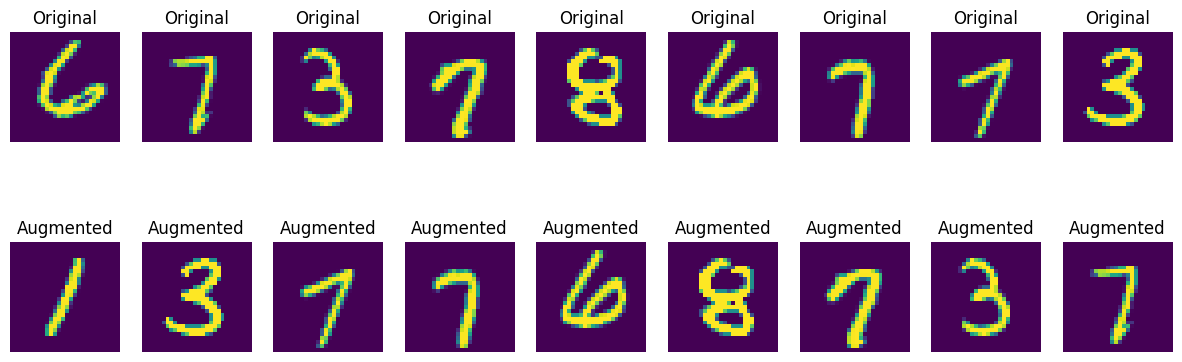

In [65]:
display_frames(images_sequence[:10], augmented_images_sequence[:10], num_frames=9)
# for some reason last image is dropped